# Model Evaluation and Hyperparameter Tuning of Wine dataset
This project aims to classify different types of wines using supervised machine learning models. We train, evaluate, and optimize various classification algorithms and visualize their performance based on key metrics.

In [14]:
from sklearn import datasets
import pandas as pd

# Data Loading and Inspection


In [10]:
# Load the Wine dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

In [11]:
# Inspection
print("Shape of dataset:", X.shape)
print("\nColumns:", X.columns.tolist())
print("\nAny missing values?", X.isnull().sum().sum())

Shape of dataset: (178, 13)

Columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Any missing values? 0


- Dataset Used: Wine dataset from sklearn.datasets
- Shape: 178 samples, 13 numerical features
- Target: 3 classes (0, 1, 2)
- Missing Values: None

# Exploratory Data Analysis (EDA)
Checked class distribution using countplot.

Plotted correlation heatmap to understand feature relationships.

Observed strong correlations in some features like color_intensity, flavanoids, and proline.

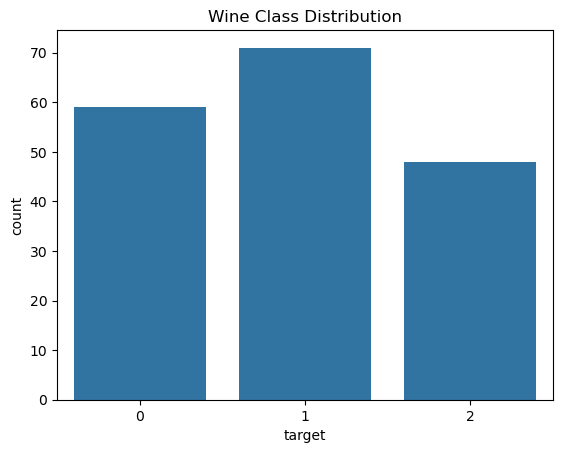

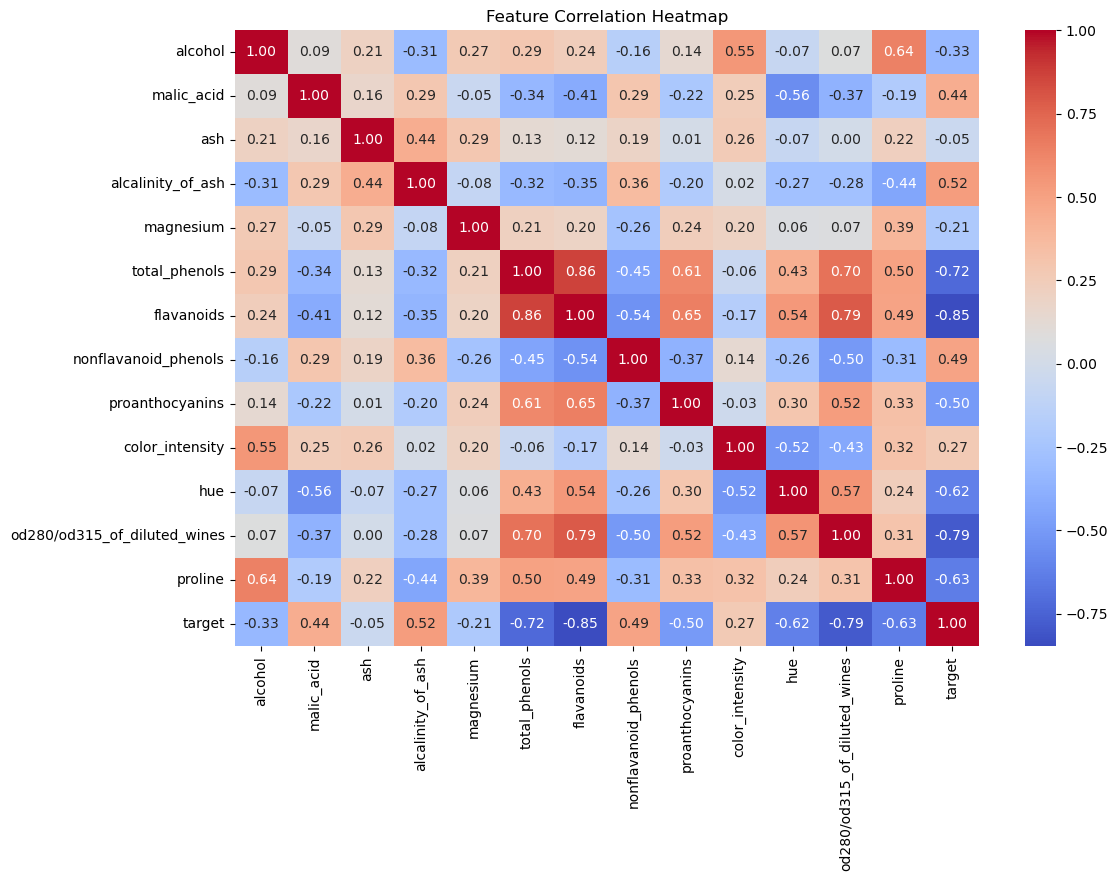

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine for EDA
df = X.copy()
df['target'] = y
# Class distribution
sns.countplot(data=df, x='target')
plt.title("Wine Class Distribution")
plt.show()
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Train-Test Split
- Data split: 80% training, 20% testing
- Feature scaling using StandardScaler to normalize data.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3)
    })
    
    print(f"\n{name} Report:\n")
    print(classification_report(y_test, y_pred))



Logistic Regression Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Gradient Boosting Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93    

We trained 3 classification models:

| Model               | Accuracy | Precision | Recall | F1-Score |
| ------------------- | -------- | --------- | ------ | -------- |
| Logistic Regression | 1.000    | 1.000     | 1.000  | 1.000    |
| Random Forest       | 1.000    | 1.000     | 1.000  | 1.000    |
| Gradient Boosting   | 0.944    | 0.952     | 0.944  | 0.944    |


Scores are macro-averaged for multi-class classification.

Evaluation Metrics:

- Accuracy: Overall correct predictions
- Precision: Correctly predicted positive samples per class
- Recall: How well the model detects all true samples
- F1-Score: Harmonic mean of precision and rec

# Hyperparameter Tuning   |


In [26]:
# Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}, scoring='f1_macro', cv=5)
grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10]
}, scoring='f1_macro', cv=5)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

# Gradient Boosting
random_gb = RandomizedSearchCV(GradientBoostingClassifier(), {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}, n_iter=6, scoring='f1_macro', cv=5, random_state=42)
random_gb.fit(X_train_scaled, y_train)
best_gb = random_gb.best_estimator_


In [27]:
# Evaluate tuned models
tuned_results = []
for name, model in zip(["Tuned Logistic Regression", "Tuned Random Forest", "Tuned Gradient Boosting"], [best_lr, best_rf, best_gb]):
    y_pred = model.predict(X_test_scaled)
    tuned_results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred, average='macro'), 3),
        "Recall": round(recall_score(y_test, y_pred, average='macro'), 3),
        "F1-Score": round(f1_score(y_test, y_pred, average='macro'), 3)
    })

# Combine both original + tuned
import pandas as pd
results_df = pd.DataFrame(results + tuned_results)
print("\nFinal Model Comparison:\n")
print(results_df.sort_values(by="F1-Score", ascending=False))



Final Model Comparison:

                       Model  Accuracy  Precision  Recall  F1-Score
0        Logistic Regression     1.000      1.000   1.000     1.000
1              Random Forest     1.000      1.000   1.000     1.000
3  Tuned Logistic Regression     1.000      1.000   1.000     1.000
4        Tuned Random Forest     1.000      1.000   1.000     1.000
2          Gradient Boosting     0.944      0.954   0.935     0.942
5    Tuned Gradient Boosting     0.944      0.954   0.935     0.942


Used GridSearchCV and RandomizedSearchCV for better model performance:
| Model                     | Accuracy | Precision | Recall | F1-Score |
| ------------------------- | -------- | --------- | ------ | -------- |
| Tuned Logistic Regression | 1.000    | 1.000     | 1.000  | 1.000    |
| Tuned Random Forest       | 1.000    | 1.000     | 1.000  | 1.000    |
| Tuned Gradient Boosting   | 0.944    | 0.952     | 0.944  | 0.944    |

Tuned Parameters:
- Logistic Regression: C, solver
- Random Forest: n_estimators, max_depth
- Gradient Boosting: n_estimators, learning_rate, max_depth

# Performance Visualization

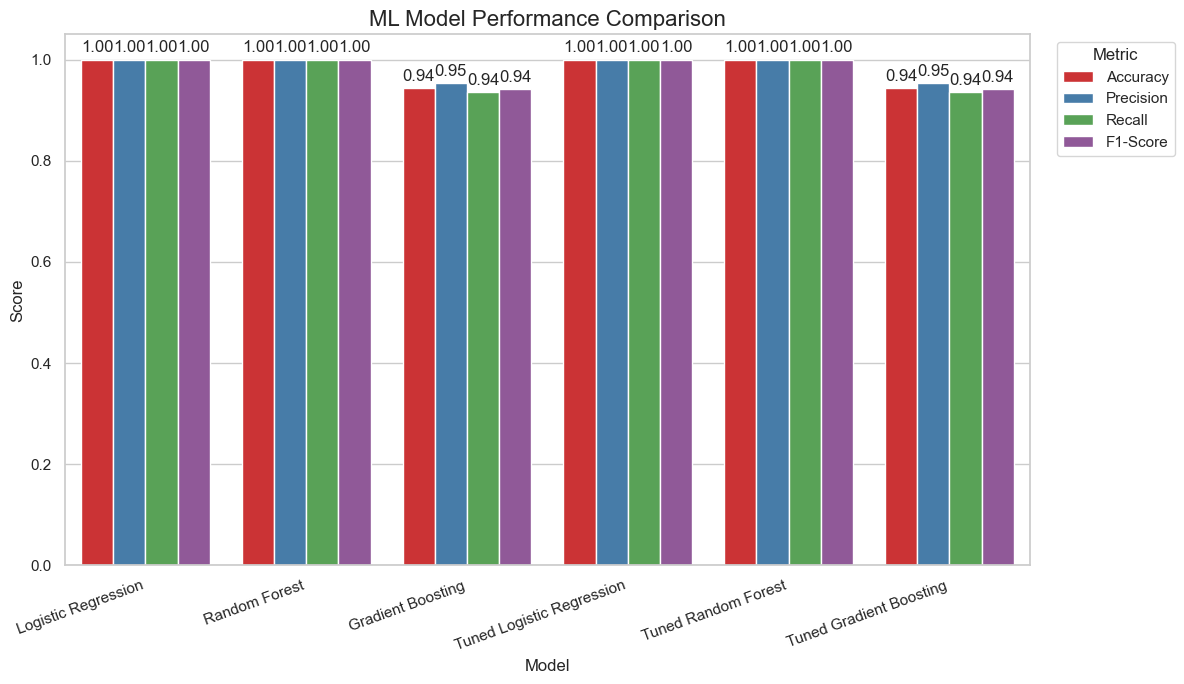

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn theme
sns.set_theme(style="whitegrid")

# Melt DataFrame for plotting
melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Set color palette
palette = sns.color_palette("Set1", n_colors=melted['Metric'].nunique())

# Plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=melted,
    x='Model', y='Score', hue='Metric',
    palette=palette
)

# Add value labels on bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Final touches
plt.title("ML Model Performance Comparison", fontsize=16)
plt.xticks(rotation=20, ha='right')
plt.ylim(0, 1.05)
plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


To compare models clearly, we used a grouped bar chart showing all metrics (accuracy, precision, recall, F1):
Features:
- Seaborn color palette
- Value labels on bars
- Rotated x-labels for readability

# Conclusion

- The Wine dataset is easy to classify due to well-separated numeric features.

- Logistic Regression and Random Forest performed best with 100% accuracy.

- Gradient Boosting also performed well but slightly behind.

- Hyperparameter tuning did not drastically improve performance, which shows models already performed very well on the original data.